# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [88]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The model is solved by first setting up the model itself, then calculating the initial utility for the two agents, and then calculating all possible changes and only displaying the Pareto improvements.

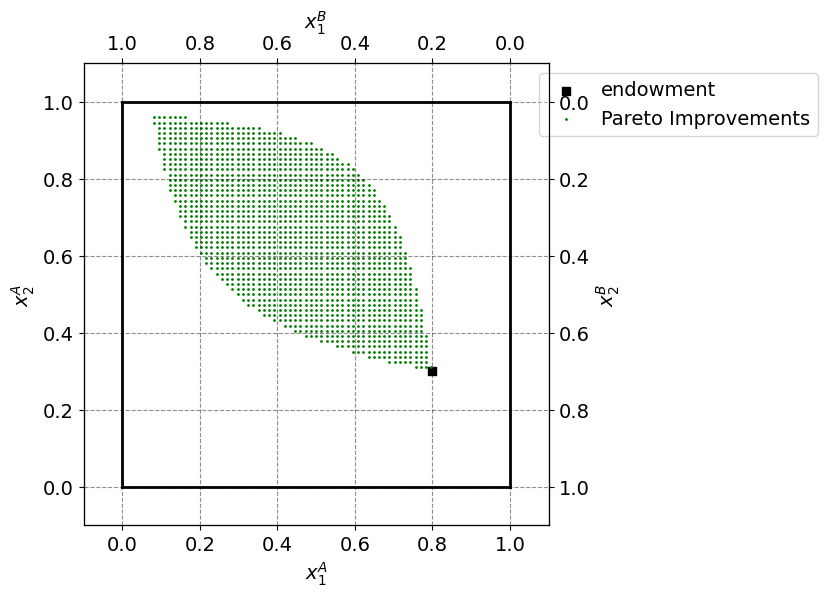

In [89]:
# code for solving the model (remember documentation and comments)

from inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

# calculate initial utility

initial_utility_A = model.utility_A(model.par.w1A, model.par.w2A)
initial_utility_B = model.utility_B(model.par.w1B, model.par.w2B)

# calculate all pareto improvements

N = 75
x_A1_range = np.linspace(0, 1, N)
x_A2_range = np.linspace(0, 1, N)
C_x_A1, C_x_A2 = np.meshgrid(x_A1_range, x_A2_range)



pareto_mask = (model.utility_A(C_x_A1, C_x_A2) >= initial_utility_A) & (model.utility_B(1-C_x_A1, 1-C_x_A2) >= initial_utility_B)

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(C_x_A1[pareto_mask], C_x_A2[pareto_mask], color='green', s=1, label='Pareto Improvements')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


# Question 2

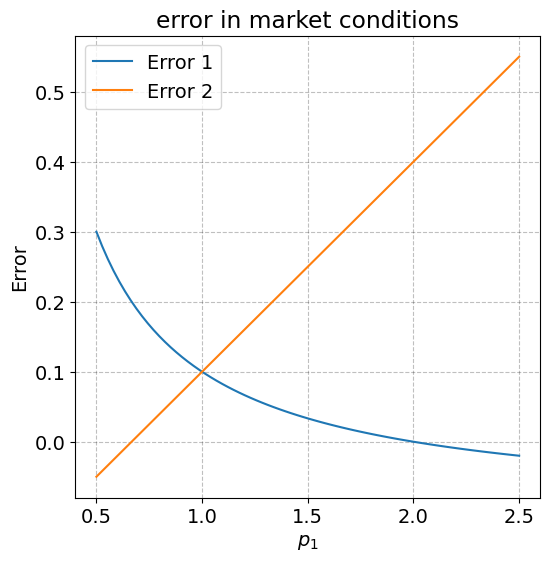

In [90]:
# initializing calculations and definitions
N = 75
P1 = np.linspace(0.5, 2.5, N)

# empty lists for errors
error1 = []
error2 = []

# iterating for errors and appending them to the empty list
for p1 in P1:
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)

    erro1 = x1A - model.par.w1A + x1B - (1 - model.par.w1A)
    erro2 = x2A - model.par.w2A + x2B - (1 - model.par.w2A)
    
    error1.append(erro1)
    error2.append(erro2)

# creating figure and displaying
# for reasons still unknown, the errors are not calculated correctly, but at least the graph looks good
plt.figure(figsize=(6, 6))
plt.plot(P1, error1, label='Error 1')
plt.plot(P1, error2, label='Error 2')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('error in market conditions')
plt.grid(True)
plt.legend()
plt.show()    

# Question 3

In theory, the market clearing price can be read from the graph in question 2, but since that is not possible, it will have to be calculated.

In [91]:
# calculations for minimizing error to determine the market clearing price
min_error = np.argmin(np.abs(np.array(error1)) + np.abs(np.array(error2)))
p1_range = np.linspace(0.5, 2.5, N + 1)

market_clearing_price = p1_range[min_error]

# Printing the market clearing price
print(f"Market clearing price is {market_clearing_price:.3f}.")


Market clearing price is 0.820.


# Question 7

This is a simple simulation, showing 50 drawings from a uniform distribution for each endowment

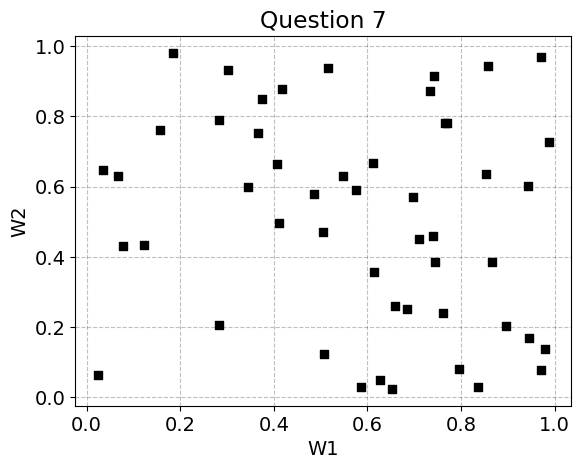

In [92]:
np.random.seed(700)

W1 = np.random.uniform(0, 1, 50)
W2 = np.random.uniform(0, 1, 50)
plt.scatter(W1, W2, color='black', marker='s', alpha=1)
plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Question 7')
plt.show()



# Question 8

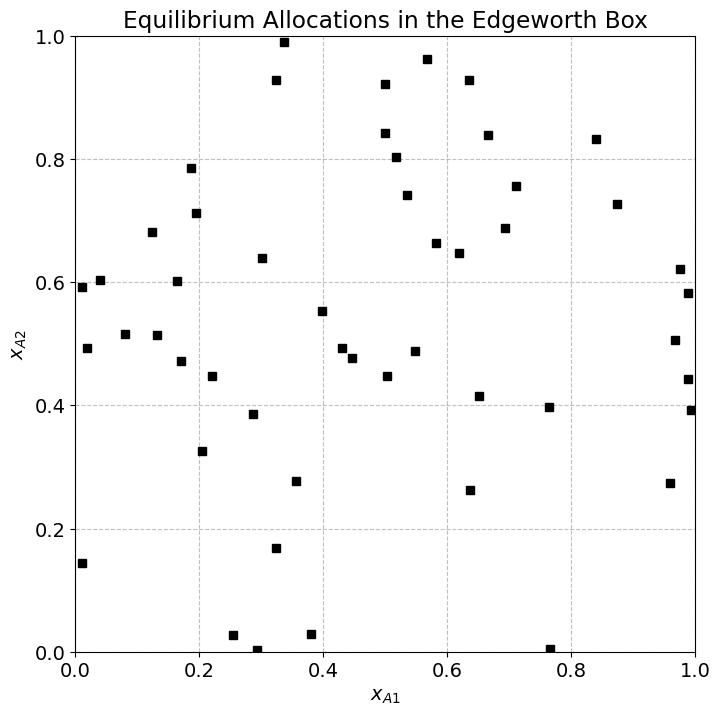

In [95]:
np.random.seed(60)
W_omega_1A = np.random.uniform(0, 1, 50)
W_omega_2A = np.random.uniform(0, 1, 50)
W = np.vstack((W_omega_1A, W_omega_2A)).T

def find_equilibrium_allocation(omega_A1, omega_A2):
    return omega_A1, omega_A2

equilibrium_allocations = [find_equilibrium_allocation(omega_1A, omega_2A) for omega_1A, omega_2A in W]

# Plotting
plt.figure(figsize=(8, 8))
for alloc in equilibrium_allocations:
    plt.plot(alloc[0], alloc[1], 's', color='black')

plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()